#Thinkful Data Science Course
##Unit 4: Predicting the Future; 
##Lesson 3: Naive Bayes

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import data
weightData = pd.read_csv('/Users/molliepettit/Desktop/Data Science/Thinkful/Projects/Unit4/ideal_weight.csv')

In [108]:
weightData

,'id','sex','actual','ideal','diff'
0,0,'Male',215,190,25
1,1,'Female',155,135,20
2,2,'Male',195,155,40
3,3,'Female',145,130,15
4,4,'Female',110,100,10
5,5,'Male',155,170,-15
6,6,'Male',155,155,0
7,7,'Female',114,110,4
8,8,'Female',135,135,0
9,9,'Male',180,171,9


###Data Cleaning and Exploration

We're going to use a dataset of ideal versus actual weight to classify gender. You can download the csv file here.

Remove the single quotes from the column names.
Remove the single quotes from the "sex" column.
Plot the distributions of actual weight and ideal weight. Plot the distributions of difference in weight. Map "sex" to a categorical variable.
Are there more women or men in the dataset?

####Remove the single quotes from the column names

In [109]:
weightData.columns

Index([''id'', ''sex'', ''actual'', ''ideal'', ''diff''], dtype='object')

In [110]:
weightData.columns = [x.strip("'") for x in weightData.columns]

In [111]:
weightData.columns

Index(['id', 'sex', 'actual', 'ideal', 'diff'], dtype='object')

####Remove the single quotes from the "sex" column.

In [112]:
clean_sex = weightData["sex"].map(lambda x: x.strip("'"))

In [113]:
clean_sex

0        Male
1      Female
2        Male
3      Female
4      Female
5        Male
6        Male
7      Female
8      Female
9        Male
10     Female
11       Male
12       Male
13     Female
14       Male
15     Female
16       Male
17       Male
18     Female
19     Female
20       Male
21     Female
22     Female
23       Male
24       Male
25     Female
26       Male
27       Male
28       Male
29       Male
        ...  
152    Female
153      Male
154      Male
155    Female
156    Female
157      Male
158    Female
159    Female
160    Female
161    Female
162      Male
163    Female
164    Female
165    Female
166    Female
167      Male
168    Female
169      Male
170      Male
171      Male
172      Male
173    Female
174      Male
175    Female
176    Female
177      Male
178    Female
179      Male
180    Female
181    Female
Name: sex, dtype: object

In [114]:
weightData["sex"] = clean_sex

In [115]:
weightData

,id,sex,actual,ideal,diff
0,0,Male,215,190,25
1,1,Female,155,135,20
2,2,Male,195,155,40
3,3,Female,145,130,15
4,4,Female,110,100,10
5,5,Male,155,170,-15
6,6,Male,155,155,0
7,7,Female,114,110,4
8,8,Female,135,135,0
9,9,Male,180,171,9


####Plot the distributions of actual weight and ideal weight.

In [116]:
%matplotlib inline

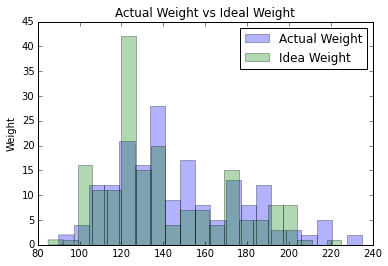

In [117]:
plt.hist(weightData['actual'], label = 'Actual Weight', alpha = 0.3, bins = 20)
plt.hist(weightData['ideal'], label = 'Idea Weight', alpha = 0.3, bins = 20)
plt.ylabel('Weight')
plt.legend(loc='upper right')
plt.title('Actual Weight vs Ideal Weight')
plt.show()

####Plot the distributions of difference in weight. 

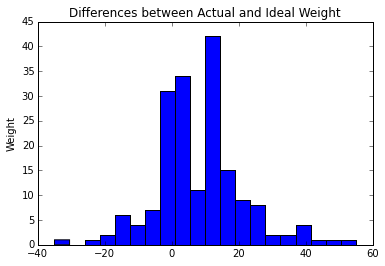

In [119]:
plt.hist((weightData['actual'] - weightData['ideal']), bins = 20)
plt.ylabel('Weight')
plt.title('Differences between Actual and Ideal Weight')
plt.show()

####Map "sex" to a categorical variable. 

In [95]:
weightData['sex_categorical'] = weightData['sex'].astype('category')
weightData['sex_categorical'] = weightData['sex_categorical'].cat.codes

In [96]:
weightData

,id,sex,actual,ideal,diff,sex_categorical
0,0,Male,215,190,25,1
1,1,Female,155,135,20,0
2,2,Male,195,155,40,1
3,3,Female,145,130,15,0
4,4,Female,110,100,10,0
5,5,Male,155,170,-15,1
6,6,Male,155,155,0,1
7,7,Female,114,110,4,0
8,8,Female,135,135,0,0
9,9,Male,180,171,9,1


####Are there more women or men in the dataset?

In [59]:
sum(weightData['sex_categorical'])

63

Out of 181 participants, there are 63 males and 118 females.

###Naive Bayes Analysis

We're going to use the sklearn.naive_bayes.GaussianNB to build our classifier of gender. A Gaussian Naive Bayes classifier assumes that the likelihood of the features is assumed to be Gaussian.

Fit a Naive Bayes classifier of sex to actual weight, ideal weight, and diff.

How many points were mislabeled? How many points were there in the dataset, total?

Predict the sex for an actual weight of 145, an ideal weight of 160, and a diff of -15.

Predict the sex for an actual weight of 160, an ideal weight of 145, and a diff of 15.

####Fit a Naive Bayes classifier of sex to actual weight, ideal weight, and diff.

In [61]:
from sklearn.naive_bayes import GaussianNB

In [120]:
actual = weightData['actual']
ideal = weightData['ideal']
diff = ((weightData['actual'] - weightData['ideal']))

In [97]:
gaus = GaussianNB()
data = weightData[['actual','ideal','diff']]
target = weightData['sex']
model = gaus.fit(data, target)
y_pred = model.predict(data)

####How many points were mislabeled? How many points were there in the dataset, total?

In [98]:
print("Number of mislabeled points out of a total %d points: %d" %(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 182 points: 14


####Predict the sex for an actual weight of 145, an ideal weight of 160, and a diff of -15.

In [101]:
d = {'actual': 145, 'ideal': 160, 'diff': -15}
weightData = pd.DataFrame(data=d, index=[1])
pred = model.predict(weightData)
print(pred)

['Male']


####Predict the sex for an actual weight of 160, an ideal weight of 145, and a diff of 15.

In [121]:
d = {'actual': 160, 'ideal': 145, 'diff': 15}
weightData = pd.DataFrame(data=d, index=[1])
pred = model.predict(weightData)
print(pred)

['Male']
